In [1]:
# Import Libraries 
import hakom
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import getpass
import urllib.request, json 
import pandas as pd
from datetime import datetime, timedelta
#teständerung

## Initializing HAKOM TSM Connector

In [2]:
api_pwd = getpass.getpass()

In [3]:
auth_params = hakom.authorization.AuthParams(
    username = 'aeneas',
    password = api_pwd,
)

service_config = hakom.service.ServiceConfig(
    base_url="https://fehostedwebapp.azurewebsites.net/MAIN/api/",
    auth_params=auth_params,
    repository='ZAMS'
)

hakom.initialize(service_config)

In [4]:
hakom.get_config().check_health()
hakom.versioninfo.get()

{'Name': 'HAKOM WebTSM Services',
 'Description': 'Time Series Management Webservices',
 'Version': '3.9.2.1-rc+0'}

Check if really logged in

In [5]:
units = pd.DataFrame.from_records(hakom.repositories.units.find())
units.head()

,ID,Name,Factor,Offset,BaseUnit,Aggregation,IntegralUnit,Description,Category
0,1,W,1.0,0.0,,AVG,Wh,None,None
1,2,kW,1000.0,0.0,W,AVG,kWh,None,None
2,3,kWh/h,1000.0,0.0,W,AVG,kWh,None,None
3,4,MW,1000000.0,0.0,W,AVG,MWh,None,None
4,5,MWh/h,1000000.0,0.0,W,AVG,MWh,None,None


# Parser

## Initialising Parameter

In [ ]:
station_str = ['A521', 'A707', 'A652','A002', 'A747', 'A612']


In [43]:
# Extracting data from INMET API via JSON file

# Edit: add list of StationsID 
# Edit: add error control: if URL is not found
data =[]

for year in range(2018,2023):

   station_str = 'A521'
   date_begin = '{}-01-01'.format(year)
   date_end = '{}-12-31'.format(year)

   url_str = 'https://apitempo.inmet.gov.br/estacao/{}/{}/{}'.format(date_begin, date_end, station_str)
   print(url_str)


   # Edit: add loop to run over list of selected stations and dates

   with urllib.request.urlopen(url_str) as url:
      temp = pd.read_json(url.read().decode())
   data.append(temp)


https://apitempo.inmet.gov.br/estacao/2018-01-01/2018-12-31/A521
https://apitempo.inmet.gov.br/estacao/2019-01-01/2019-12-31/A521
https://apitempo.inmet.gov.br/estacao/2020-01-01/2020-12-31/A521
https://apitempo.inmet.gov.br/estacao/2021-01-01/2021-12-31/A521
https://apitempo.inmet.gov.br/estacao/2022-01-01/2022-12-31/A521


In [52]:
len(data)
data[0]
df = pd.concat(data)
df.head()
df.shape
data=df

In [44]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

In [53]:
# Verifying data format

print('Input data has ', len(data), 'entries.')
print('Each entry has ', len(data.iloc[0]), 'variables.')
print('List of variables:', data.columns)


Input data has  43824 entries.
Each entry has  27 variables.
List of variables: Index(['DC_NOME', 'PRE_INS', 'TEM_SEN', 'VL_LATITUDE', 'PRE_MAX', 'UF',
       'RAD_GLO', 'PTO_INS', 'TEM_MIN', 'VL_LONGITUDE', 'UMD_MIN', 'PTO_MAX',
       'VEN_DIR', 'DT_MEDICAO', 'CHUVA', 'PRE_MIN', 'UMD_MAX', 'VEN_VEL',
       'PTO_MIN', 'TEM_MAX', 'TEN_BAT', 'VEN_RAJ', 'TEM_CPU', 'TEM_INS',
       'UMD_INS', 'CD_ESTACAO', 'HR_MEDICAO'],
      dtype='object')


In [74]:
data['timestamp'] = pd.to_datetime(data['DT_MEDICAO']) + pd.to_timedelta(data['HR_MEDICAO'] // 100, unit='h')
data = data.set_index('timestamp')
data = data.asfreq('h')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2018-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DC_NOME       43824 non-null  object 
 1   PRE_INS       38252 non-null  float64
 2   TEM_SEN       38252 non-null  float64
 3   VL_LATITUDE   43824 non-null  float64
 4   PRE_MAX       38244 non-null  float64
 5   UF            43824 non-null  object 
 6   RAD_GLO       38252 non-null  float64
 7   PTO_INS       38252 non-null  float64
 8   TEM_MIN       38244 non-null  float64
 9   VL_LONGITUDE  43824 non-null  float64
 10  UMD_MIN       38244 non-null  float64
 11  PTO_MAX       38244 non-null  float64
 12  VEN_DIR       38252 non-null  float64
 13  DT_MEDICAO    43824 non-null  object 
 14  CHUVA         38252 non-null  float64
 15  PRE_MIN       38244 non-null  float64
 16  UMD_MAX       38244 non-null  float64
 17  VEN_VEL       38252 non-nu

In [76]:
data.head()

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,BELO HORIZONTE (PAMPULHA),918.5,23.4,-19.883889,918.5,MG,-3.2,19.0,21.6,-43.969444,...,0.7,17.0,22.5,12.6,2.3,24.0,21.7,85.0,A521,0
2018-01-01 01:00:00,BELO HORIZONTE (PAMPULHA),918.9,23.2,-19.883889,918.9,MG,-3.0,19.4,21.0,-43.969444,...,0.8,18.9,21.7,12.6,2.3,23.0,21.3,89.0,A521,100
2018-01-01 02:00:00,BELO HORIZONTE (PAMPULHA),918.8,23.6,-19.883889,919.2,MG,-2.8,19.4,21.2,-43.969444,...,0.6,19.3,21.9,12.6,1.3,23.0,21.7,87.0,A521,200
2018-01-01 03:00:00,BELO HORIZONTE (PAMPULHA),918.4,23.3,-19.883889,918.8,MG,-2.0,19.3,21.2,-43.969444,...,0.3,19.2,21.7,12.6,1.3,23.0,21.2,89.0,A521,300
2018-01-01 04:00:00,BELO HORIZONTE (PAMPULHA),917.6,22.9,-19.883889,918.4,MG,-1.2,19.2,20.8,-43.969444,...,0.3,19.2,21.3,12.6,2.0,23.0,20.8,91.0,A521,400


In [64]:
# Creating the dataframes
data.sort_values(by="timestamp", inplace = True)
df_temp = data[['timestamp','TEM_INS']]
df_wdir = data[['timestamp', 'VEN_DIR']]
df_wspeed = data[['timestamp','VEN_VEL']]

In [65]:
df_temp.head()

,timestamp,TEM_INS
0,2018-01-01 00:00:00,21.7
1,2018-01-01 01:00:00,21.3
2,2018-01-01 02:00:00,21.7
3,2018-01-01 03:00:00,21.2
4,2018-01-01 04:00:00,20.8


In [66]:
df_test = df_temp.copy()
df_test = df_test.set_index('timestamp')
df_test = hakom.pandas_interop.create_timestamp_colum_from_index(df_test)
df_test['flag'] = 9
one_hour_interval = hakom.types.Interval(hakom.types.Intervals.Hour)
unit_label = '°C'
tsdc = hakom.pandas_interop.to_hakom_tsdata_collection(
    df_test.dropna(),
    interval=one_hour_interval,
    unit=unit_label,
    dt_flag_value_order=[2,1,3]
)
tsdc.Data[:3]

[TimeSeriesDataItemTimeStamp(From='2018-01-01T00:00:00.000000Z', Value=21.7, Flag=9),
 TimeSeriesDataItemTimeStamp(From='2018-01-01T01:00:00.000000Z', Value=21.3, Flag=9),
 TimeSeriesDataItemTimeStamp(From='2018-01-01T02:00:00.000000Z', Value=21.7, Flag=9)]

In [70]:
test_time_series_name = 'temperature_test_aeneas'

ts_def = hakom.repositories.timeseries.get(test_time_series_name)
created = ts_def['ID']
ts_def

{'ID': 2500,
 'Name': 'temperature_test_aeneas',
 'Description': '',
 'Type': 1,
 'Interval': {'Value': 3, 'Multiplier': 1},
 'Unit': '°C',
 'Table': None,
 'ArchiveTable': None,
 'Formula': None,
 'TimeZone': None,
 'StartOfYear': 1,
 'StartOfDay': 0,
 'PreserveDuplicatedValues': False,
 'Aggregation': None,
 'QuotationDefaultBehavior': None,
 'Quotation': False,
 'Audit': False,
 'Compressed': False,
 'ExchangeTimeSeries': []}

In [68]:


# see if time series exists
# definition = hakom.types.TimeSeriesDefinition(
#     Name=test_time_series_name,
#     Type=hakom.types.TimeSeriesTypes.Begin,
#     Unit=unit_label,
#     Interval=one_hour_interval,
# )

# created = hakom.repositories.timeseries.create(definition)
# created

In [71]:
hakom.repositories.timeseries.data.save(created, tsdc)

True

In [38]:
min_date = df_test.iloc[0]['from']
max_date = df_test.iloc[-1]['from']
data_query = {"from": min_date, "to": max_date}
retrieved_data = hakom.repositories.timeseries.data.get(created, data_query)

ret_df = hakom.pandas_interop.to_pandas_dataframe(retrieved_data)
ret_df.head()

,Value,Flag
From,,
2018-01-01 00:00:00+00:00,21.7,9
2018-01-01 01:00:00+00:00,21.3,9
2018-01-01 02:00:00+00:00,21.7,9
2018-01-01 03:00:00+00:00,21.2,9
2018-01-01 04:00:00+00:00,20.8,9


<AxesSubplot:xlabel='From'>

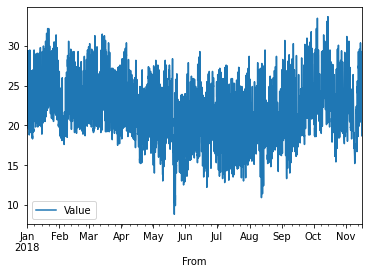

In [40]:
ret_df.plot(y=['Value'])